<h1> Task 2 </h1>

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and assess the data

In [2]:
# Load data
data = pd.read_csv('QVI_data.csv')
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
# Check for null values
data.isna().value_counts()

LYLTY_CARD_NBR  DATE   STORE_NBR  TXN_ID  PROD_NBR  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  BRAND  LIFESTAGE  PREMIUM_CUSTOMER
False           False  False      False   False     False      False     False      False      False  False      False               264834
Name: count, dtype: int64

In [4]:
# Confirm dtypes
data.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

## Select control stores

We will start by defining a few metrics by which we will select stores. As the trial stores need to be similar to the trial stores, we will match based on these metrics. In order to do this we will need to transform the data first.

- Create a month column in the format of yyyymm

In [5]:
# Convert date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Add month column in the format of yyyymm
data['MONTH'] = data['DATE'].dt.strftime('%Y%m').astype(int)
data.sort_values(['STORE_NBR', 'DATE'])

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
253,1233,2018-07-01,1,266,110,WW Original Corn Chips 200g,1,1.9,200,WOOLWORTHS,YOUNG FAMILIES,Mainstream,201807
547,1482,2018-07-01,1,563,8,Smiths Crinkle Cut Chips Original 170g,1,2.9,170,SMITHS,YOUNG SINGLES/COUPLES,Mainstream,201807
104,1096,2018-07-02,1,110,68,Pringles Chicken Salt Crips 134g,1,3.7,134,PRINGLES,OLDER SINGLES/COUPLES,Premium,201807
430,1384,2018-07-02,1,445,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG SINGLES/COUPLES,Budget,201807
466,1414,2018-07-02,1,482,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,DORITOS,RETIREES,Mainstream,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264570,272242,2019-06-25,272,269986,81,Pringles Original Crisps 134g,2,7.4,134,PRINGLES,RETIREES,Mainstream,201906
264234,272005,2019-06-26,272,269641,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Budget,201906
264300,272055,2019-06-28,272,269709,50,Tostitos Lightly Salted 175g,2,8.8,175,TOSTITOS,RETIREES,Budget,201906
264326,272074,2019-06-30,272,269737,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Budget,201906


- Aggregate the data into the monthly amounts of each column split by Store number

In [6]:
def metric_calc():
    measure = data.groupby(['STORE_NBR', 'MONTH'])
    totSales = measure['TOT_SALES'].sum()
    nCustomers = measure['LYLTY_CARD_NBR'].nunique()
    nTxnPerCust = measure['TXN_ID'].count() / nCustomers
    nChipsPerTxn = measure['PROD_QTY'].sum() / measure['TXN_ID'].count()
    avgPricePerUnit = totSales / measure['PROD_QTY'].sum()
    aggregate = [totSales, nCustomers, nTxnPerCust, nChipsPerTxn, avgPricePerUnit]
    metrics = pd.concat(aggregate, axis=1)
    metrics.columns = ['totSales', 'nCustomers', 'nTxnPerCust', 'nChipsPerTxn', 'avgPricePerUnit']
    return metrics

In [7]:
# Create metrics dataframe
measureOverTime = metric_calc().reset_index()

# Sort by month
measureOverTime = measureOverTime.sort_values(['STORE_NBR','MONTH'])

measureOverTime

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


- Now we can filter the data between the pre-trial data and the full observation period stores

In [8]:
# Full observation data 

# Find stores that were observed for the full period
observe_counts = measureOverTime['STORE_NBR'].value_counts()
observe_index = observe_counts[observe_counts == 12].index

# Filter into new dataframe with only the stores found
storesWithFullObs = measureOverTime[measureOverTime['STORE_NBR'].isin(observe_index)]
storesWithFullObs

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,1.895833,4.346154
3165,272,201903,442.3,50,1.060000,1.905660,4.379208
3166,272,201904,445.1,54,1.037037,1.875000,4.239048
3167,272,201905,314.6,34,1.176471,1.775000,4.430986


In [9]:
# Pre-trial data

# Filter all stores in the full observation to only have the data before the trial period
preTrialMeasures = measureOverTime[(measureOverTime['MONTH'] < 201902) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs['STORE_NBR']))]
preTrialMeasures

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


Now that our data is filtered we can rank the similarity between control and trial stores

- Calculate correlation between each of the trial stores and control stores

In [10]:
# Correlation calculation
def calculateCorrelation(metricCol, storeComparison, inputTable = preTrialMeasures):
    # Create table of the trial stores
    controlStores = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    corr = pd.DataFrame()
    trialStore = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].reset_index()
    for control in controlStores:
        storage_df = pd.DataFrame(columns= ['TRIAL_STORE', 'CONTROL_STORE', 'CORRELATION_SCORE'])
        control_store = inputTable[inputTable['STORE_NBR'] == control][metricCol].reset_index()
        storage_df['CORRELATION_SCORE'] = trialStore.corrwith(control_store, axis=0)
        storage_df['TRIAL_STORE'] = storeComparison
        storage_df['CONTROL_STORE'] = control
        corr = pd.concat([corr, storage_df])
    corr = corr.groupby(['CONTROL_STORE']).mean().reset_index()
    corr['TRIAL_STORE'] = corr['TRIAL_STORE'].astype(int)
    return corr

- We can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance

In [11]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable = preTrialMeasures):
    controlStores = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]['STORE_NBR'].unique()
    calcDistTable = pd.DataFrame()
    
    for control in controlStores:
        calculatedMeasure = pd.DataFrame(columns= ['MONTH', 'TRIAL_STORE', 'CONTROL_STORE', 'MEASURE'])
        calculatedMeasure['MONTH'] = list(inputTable[inputTable['STORE_NBR'] == storeComparison]['MONTH'])
        calculatedMeasure['TRIAL_STORE'] = storeComparison
        calculatedMeasure['CONTROL_STORE'] = control
        calculatedMeasure['MEASURE'] = abs(inputTable[inputTable['STORE_NBR'] == storeComparison].reset_index()[metricCol] - inputTable[inputTable['STORE_NBR'] == control].reset_index()[metricCol]) 
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure])
    return calcDistTable

- Now convert the measure column into an absolute value between 0 and 1 for the entire pre-trial period

In [12]:
# Standardize the magnitude distance
def minMaxDist(calcDistTable):
    # Calculate min and max distances by grouping by 'TRIAL_STORE' and 'MONTH'
    min_max_dist = calcDistTable.groupby(['TRIAL_STORE', 'MONTH'])['MEASURE'].agg(['min', 'max']).reset_index()
    min_max_dist.columns = ['TRIAL_STORE', 'MONTH', 'minDist', 'maxDist']

    # Merge the calculated min and max distances with the original calcDistTable
    distTable = pd.merge(calcDistTable, min_max_dist, on=['TRIAL_STORE', 'MONTH'])

    # Calculate the magnitude MEASURE
    distTable['mag_measure'] = 1 - (distTable['MEASURE'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist'])
    finalDistTable = distTable.groupby(['CONTROL_STORE', 'TRIAL_STORE'])['mag_measure'].mean().reset_index()
    finalDistTable.convert_dtypes()
    return finalDistTable

Now we can put the funtions to use calculating the metrics in specificity

### <ins>Trial Store 77 analysis</ins>

- Start with correlation of total sales and number of customers with store 77

In [13]:
corr_nSales = calculateCorrelation('totSales', 77)
corr_nSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,77,0.537609
1,2,77,0.368461
2,3,77,0.903322
3,4,77,0.368350
4,5,77,0.444674
...,...,...,...
252,268,77,0.672379
253,269,77,0.342135
254,270,77,0.657715
255,271,77,0.677744


In [14]:
corr_nCustomers = calculateCorrelation('nCustomers', 77)
corr_nCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,77,0.661084
1,2,77,0.213975
2,3,77,0.917104
3,4,77,0.352181
4,5,77,0.685329
...,...,...,...
252,268,77,0.684759
253,269,77,0.262854
254,270,77,0.434370
255,271,77,0.509815


- And now the magnitude for these same options

In [15]:
magnitude_nSales = minMaxDist(calculateMagnitudeDistance('totSales', 77))
magnitude_nSales

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,77,0.955061
1,2,77,0.939318
2,3,77,0.354963
3,4,77,0.177414
4,5,77,0.554066
...,...,...,...
252,268,77,0.962563
253,269,77,0.452903
254,270,77,0.446991
255,271,77,0.553304


In [16]:
magnitude_nCustomers = minMaxDist(calculateMagnitudeDistance('nCustomers', 77))
magnitude_nCustomers

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,77,0.940321
1,2,77,0.924638
2,3,77,0.345067
3,4,77,0.189579
4,5,77,0.481199
...,...,...,...
252,268,77,0.939907
253,269,77,0.343547
254,270,77,0.357725
255,271,77,0.483457


- We shall now create a function to merge the magnitude and correlation tables

In [17]:
def merge_calcs(metricCol, storeComparison):
    corr = calculateCorrelation(metricCol, storeComparison)
    magnitude = minMaxDist(calculateMagnitudeDistance(metricCol, storeComparison))
    combine = corr.merge(magnitude, on=['TRIAL_STORE', 'CONTROL_STORE'])
    combine['Merged_Score'] = 0.5 * combine['CORRELATION_SCORE'] + 0.5 * combine['mag_measure']
    return combine

- Now test the function by merging sales and customer scores

In [18]:
scoreNSales = merge_calcs(['totSales'], 77)
scoreNSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,77,0.537609,0.955061,0.746335
1,2,77,0.368461,0.939318,0.653889
2,3,77,0.903322,0.354963,0.629143
3,4,77,0.368350,0.177414,0.272882
4,5,77,0.444674,0.554066,0.499370
...,...,...,...,...,...
252,268,77,0.672379,0.962563,0.817471
253,269,77,0.342135,0.452903,0.397519
254,270,77,0.657715,0.446991,0.552353
255,271,77,0.677744,0.553304,0.615524


In [19]:
scoreNCustomers = merge_calcs('nCustomers', 77)
scoreNCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,77,0.661084,0.940321,0.800702
1,2,77,0.213975,0.924638,0.569306
2,3,77,0.917104,0.345067,0.631085
3,4,77,0.352181,0.189579,0.270880
4,5,77,0.685329,0.481199,0.583264
...,...,...,...,...,...
252,268,77,0.684759,0.939907,0.812333
253,269,77,0.262854,0.343547,0.303200
254,270,77,0.434370,0.357725,0.396048
255,271,77,0.509815,0.483457,0.496636


With the functions working to calculated based on an individual driver, and the tables already generated for Sales and customer, we can move onto the next step.

- Combine the generated scores together to create a new average score table

In [20]:
scoreControl = scoreNSales.merge(scoreNCustomers, on= ['TRIAL_STORE', 'CONTROL_STORE'])
scoreControl['Final_Score'] = 0.5 * scoreControl['Merged_Score_x'] + 0.5 * scoreControl['Merged_Score_y']
scoreControl

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
0,1,77,0.537609,0.955061,0.746335,0.661084,0.940321,0.800702,0.773519
1,2,77,0.368461,0.939318,0.653889,0.213975,0.924638,0.569306,0.611598
2,3,77,0.903322,0.354963,0.629143,0.917104,0.345067,0.631085,0.630114
3,4,77,0.368350,0.177414,0.272882,0.352181,0.189579,0.270880,0.271881
4,5,77,0.444674,0.554066,0.499370,0.685329,0.481199,0.583264,0.541317
...,...,...,...,...,...,...,...,...,...
252,268,77,0.672379,0.962563,0.817471,0.684759,0.939907,0.812333,0.814902
253,269,77,0.342135,0.452903,0.397519,0.262854,0.343547,0.303200,0.350360
254,270,77,0.657715,0.446991,0.552353,0.434370,0.357725,0.396048,0.474200
255,271,77,0.677744,0.553304,0.615524,0.509815,0.483457,0.496636,0.556080


We can sort the dataframe by the final score column to find the highest matching store

In [21]:
scoreControl.sort_values('Final_Score', ascending=False).head()

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
218,233,77,0.951887,0.987091,0.969489,0.995179,0.992773,0.993976,0.981733
38,41,77,0.891616,0.966917,0.929267,0.922110,0.974639,0.948374,0.938821
15,17,77,0.921334,0.882314,0.901824,0.873654,0.962495,0.918075,0.909949
238,254,77,0.788554,0.924468,0.856511,0.958104,0.937131,0.947618,0.902064
105,115,77,0.844579,0.934576,0.889578,0.859441,0.965916,0.912678,0.901128


The store with the highest final score, and therefore the closest to the selected trial store, is Store 233. Now that we have found a control store, let's visually check if the drivers are indeed similar in the period before the trial.

- We will first filter the driver data for the stores

In [22]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[pastSales['MONTH'] < 201903]
pastSales.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
880,77,201807,296.8,51,1.078431,1.527273,3.533333,Trial,2018-07-01
881,77,201808,255.5,47,1.021277,1.541667,3.452703,Trial,2018-08-01
882,77,201809,225.2,42,1.047619,1.590909,3.217143,Trial,2018-09-01
883,77,201810,204.5,37,1.027027,1.368421,3.932692,Trial,2018-10-01
884,77,201811,245.3,41,1.073171,1.522727,3.661194,Trial,2018-11-01


- Next we will plot the total sales for both stores to visually compare them

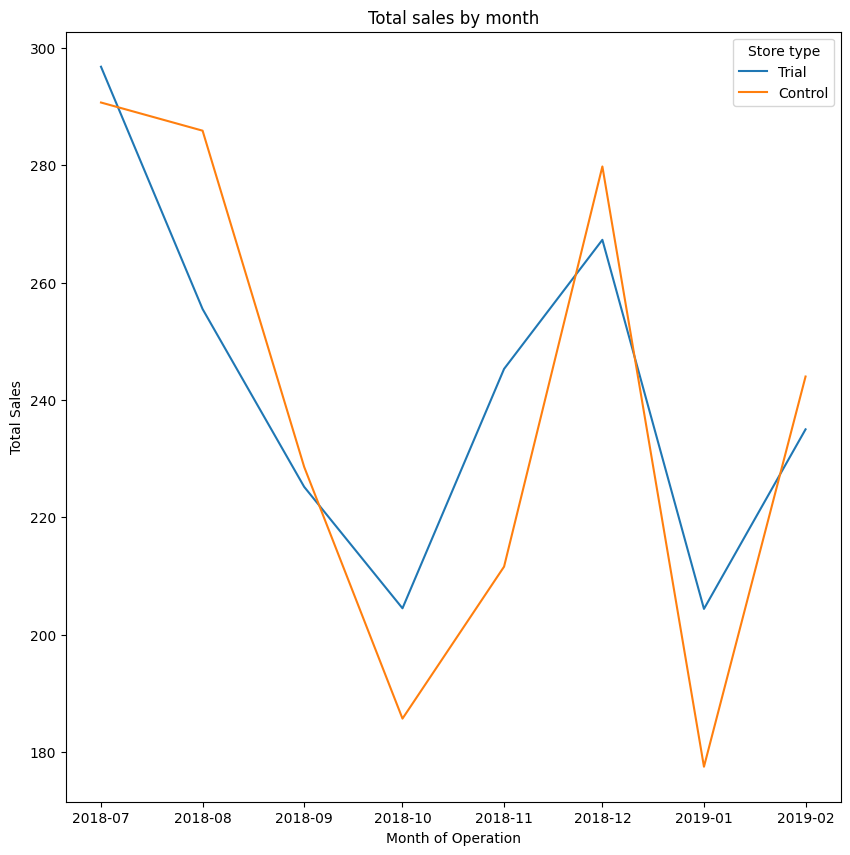

In [23]:
# Plot graph
plt.figure(figsize=(10,10))
sns.lineplot(pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total sales by month')
plt.legend(title= 'Store type')

- We will do the same for customers

In [24]:
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[pastCustomers['MONTH'] < 201903]
pastCustomers.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
880,77,201807,296.8,51,1.078431,1.527273,3.533333,Trial,2018-07-01
881,77,201808,255.5,47,1.021277,1.541667,3.452703,Trial,2018-08-01
882,77,201809,225.2,42,1.047619,1.590909,3.217143,Trial,2018-09-01
883,77,201810,204.5,37,1.027027,1.368421,3.932692,Trial,2018-10-01
884,77,201811,245.3,41,1.073171,1.522727,3.661194,Trial,2018-11-01


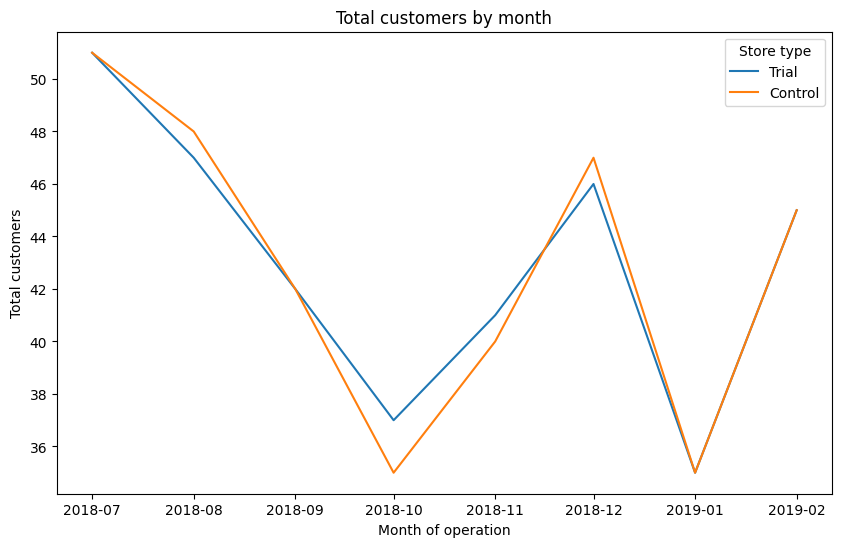

In [25]:
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.title('Total customers by month')
plt.legend(title='Store type')

Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [26]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 77) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 233) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 233].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
2699,201807,233,297.565550
2700,201808,233,292.652187
2701,201809,233,233.998916
2702,201810,233,190.085733
2703,201811,233,216.597421
2704,201812,233,286.408121
2705,201901,233,181.692071
2706,201902,233,249.762622
2707,201903,233,203.802205
2708,201904,233,162.345704


- Calculate the percentage difference between scaled control sales and trial sales 

In [27]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==77][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,233,297.565550,77,296.8,-0.002573
1,201808,233,292.652187,77,255.5,-0.126950
2,201809,233,233.998916,77,225.2,-0.037602
3,201810,233,190.085733,77,204.5,0.075830
4,201811,233,216.597421,77,245.3,0.132516
5,201812,233,286.408121,77,267.3,-0.066716
6,201901,233,181.692071,77,204.4,0.124980
7,201902,233,249.762622,77,235.0,-0.059107
8,201903,233,203.802205,77,278.5,0.366521
9,201904,233,162.345704,77,263.5,0.623080


- Calculate the standard deviation for the percentage difference between sales over the period

In [28]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.09958646884078388

- Calculate the t-values of the trial months

In [29]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,233,249.762622,77,235.0,-0.059107,-1.471383
8,201903,233,203.802205,77,278.5,0.366521,2.802568
9,201904,233,162.345704,77,263.5,0.623080,5.378807


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [30]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


We can observe that the t-values for March and April are much larger the the 95th percentile of the distribution. This means that the increase in sales in the trial store in March and April are significantly greater than that in the control store.

Let's visualize this by plotting the sales and the 95th percentile value of the stores for the trial period.

- Filter data for the 2 stores total sales, and the 95th and 5th percentiles of the control store sales

In [31]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[(pastSales['MONTH'] >= 201902) & (pastSales['MONTH'] <= 201904)]
# Create new dataframe with the totSales of control store set to 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the totSales of control store set to 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
887,77,201902,235.000000,45,1.000000,1.644444,3.175676,Trial,2019-02-01
888,77,201903,278.500000,50,1.100000,1.490909,3.396341,Trial,2019-03-01
889,77,201904,263.500000,47,1.021277,1.625000,3.378205,Trial,2019-04-01
2706,233,201902,244.000000,45,1.044444,1.489362,3.485714,Control,2019-02-01
2707,233,201903,199.100000,40,1.025000,1.439024,3.374576,Control,2019-03-01
2708,233,201904,158.600000,30,1.100000,1.393939,3.447826,Control,2019-04-01
2706,233,201902,292.598197,45,1.044444,1.489362,3.485714,Control 95th % confidence interval,2019-02-01
2707,233,201903,238.755332,40,1.025000,1.439024,3.374576,Control 95th % confidence interval,2019-03-01
2708,233,201904,190.188828,30,1.100000,1.393939,3.447826,Control 95th % confidence interval,2019-04-01
2706,233,201902,195.401803,45,1.044444,1.489362,3.485714,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total sales by month')

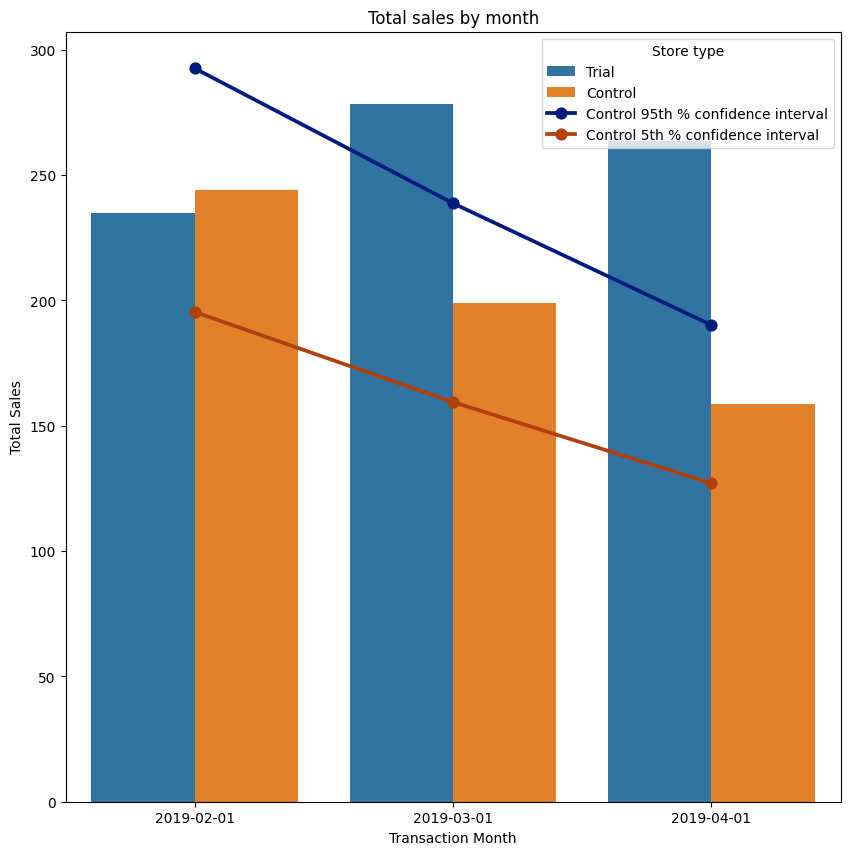

In [32]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
sns.pointplot(data=line, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax, palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales')
plt.legend(title='Store type')
plt.title('Total sales by month')

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let us now look at this assessment for the number of customers as well. We will be repeating the process from above and only displaying the outputs relevant to our analysis

In [33]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 77) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 233) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum()

# Apply the scaling factor
scaledControlCustomers = measureOverTime[measureOverTime['STORE_NBR'] == 233].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactor
scaledControlCustomers = scaledControlCustomers[['MONTH', 'STORE_NBR', 'controlCustomers']]

# Calculate the percentage difference between the trial and scaled control values
percentagediff = pd.merge(scaledControlCustomers, measureOverTime[measureOverTime['STORE_NBR']==77][['MONTH', 'STORE_NBR', 'nCustomers']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['nCustomers'] - percentagediff['controlCustomers'])/percentagediff['controlCustomers']

# Calculate the standard deviation
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()

- Calculate the t-values of the customer amounts

In [34]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlCustomers,STORE_NBR_y,nCustomers,percentageDiff,tValue
7,201902,233,45.151007,77,45,-0.003344,-2.486836
8,201903,233,40.134228,77,50,0.245819,6.593494
9,201904,233,30.100671,77,47,0.561427,18.095245


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [35]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


In [36]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==77) | (measureOverTime['STORE_NBR']==233)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 77
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[(pastCustomers['MONTH'] >= 201902) & (pastCustomers['MONTH'] <= 201904)]

# Create new dataframe with the nCustomers of control store set to 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the nCustomers of control store set to 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
887,77,201902,235.0,45.000000,1.000000,1.644444,3.175676,Trial,2019-02-01
888,77,201903,278.5,50.000000,1.100000,1.490909,3.396341,Trial,2019-03-01
889,77,201904,263.5,47.000000,1.021277,1.625000,3.378205,Trial,2019-04-01
2706,233,201902,244.0,45.000000,1.044444,1.489362,3.485714,Control,2019-02-01
2707,233,201903,199.1,40.000000,1.025000,1.439024,3.374576,Control,2019-03-01
2708,233,201904,158.6,30.000000,1.100000,1.393939,3.447826,Control,2019-04-01
2706,233,201902,244.0,47.469596,1.044444,1.489362,3.485714,Control 95th % confidence interval,2019-02-01
2707,233,201903,199.1,42.195197,1.025000,1.439024,3.374576,Control 95th % confidence interval,2019-03-01
2708,233,201904,158.6,31.646398,1.100000,1.393939,3.447826,Control 95th % confidence interval,2019-04-01
2706,233,201902,244.0,42.530404,1.044444,1.489362,3.485714,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total sales by month')

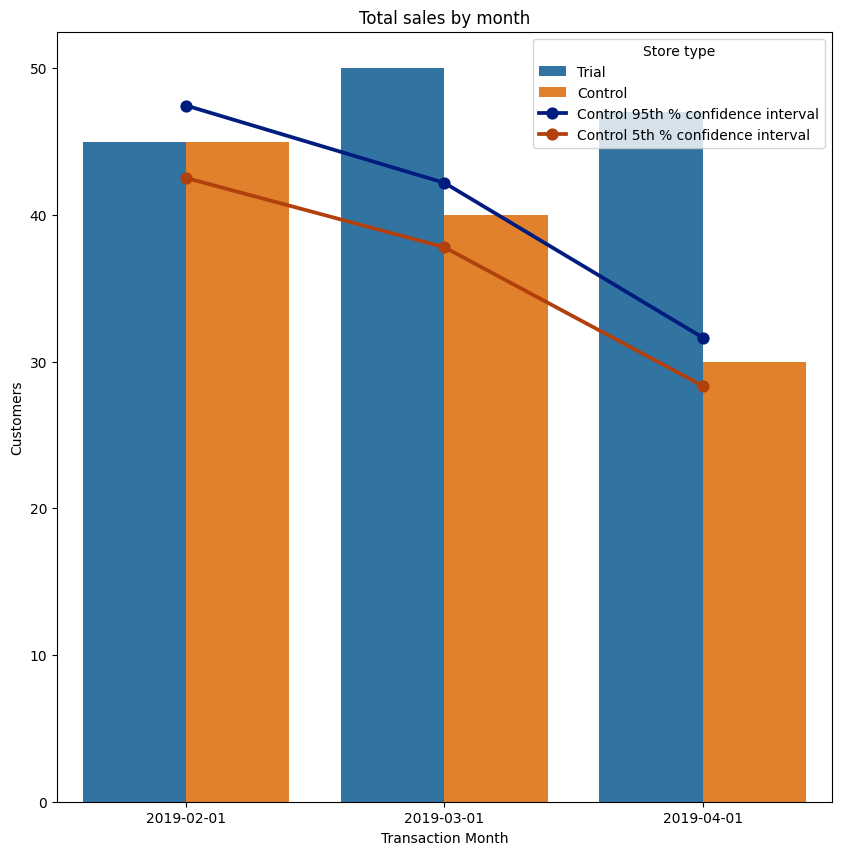

In [37]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='nCustomers', hue='Store_type')
sns.pointplot(data=line, x='TransactionMonth', y='nCustomers', hue='Store_type', palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Customers')
plt.legend(title='Store type')
plt.title('Total sales by month')

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

We can now use the same method as before to identify the most suitable control store and assess the impact of the trial on the trial stores. The next trial store to examine will be store 86

### <ins>Trial Store 86 analysis</ins>

- Calculate the correlation scores for each store with trial store 86 for drivers total sales and customers.

In [38]:
# Sales correlation
corr_nSales = calculateCorrelation('totSales', 86)
corr_nSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,86,0.722816
1,2,86,0.298083
2,3,86,0.369358
3,4,86,0.480482
4,5,86,0.617580
...,...,...,...
252,268,86,0.273909
253,269,86,0.848528
254,270,86,0.134661
255,271,86,0.763819


In [39]:
# Customers correlation
corr_nCustomers = calculateCorrelation('nCustomers', 86)
corr_nCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,86,0.742916
1,2,86,0.456920
2,3,86,0.323107
3,4,86,0.415196
4,5,86,0.373385
...,...,...,...
252,268,86,0.482863
253,269,86,0.450707
254,270,86,0.116366
255,271,86,0.633696


- Next calculate and create tables for the magnitude distance for the drivers between store 86 and the other stores

In [40]:
magnitude_nSales = minMaxDist(calculateMagnitudeDistance('totSales', 86))
magnitude_nSales

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,86,0.220565
1,2,86,0.179640
2,3,86,0.762894
3,4,86,0.498526
4,5,86,0.929321
...,...,...,...
252,268,86,0.250819
253,269,86,0.902040
254,270,86,0.834520
255,271,86,0.922919


In [41]:
magnitude_nCustomers = minMaxDist(calculateMagnitudeDistance('nCustomers', 86))
magnitude_nCustomers

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,86,0.444597
1,2,86,0.380620
2,3,86,0.911850
3,4,86,0.773922
4,5,86,0.926509
...,...,...,...
252,268,86,0.427390
253,269,86,0.917082
254,270,86,0.890489
255,271,86,0.935896


- The seperate tables for correlation and magnitude distance can now be merged to calculate a final score for each store

In [42]:
scoreNSales = merge_calcs(['totSales'], 86)

In [43]:
scoreNCustomers = merge_calcs('nCustomers', 86)
scoreNCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,86,0.742916,0.444597,0.593756
1,2,86,0.456920,0.380620,0.418770
2,3,86,0.323107,0.911850,0.617478
3,4,86,0.415196,0.773922,0.594559
4,5,86,0.373385,0.926509,0.649947
...,...,...,...,...,...
252,268,86,0.482863,0.427390,0.455126
253,269,86,0.450707,0.917082,0.683895
254,270,86,0.116366,0.890489,0.503427
255,271,86,0.633696,0.935896,0.784796


In [44]:
# Merge score tables to calculate final score 
scoreControl = scoreNSales.merge(scoreNCustomers, on= ['TRIAL_STORE', 'CONTROL_STORE'])
scoreControl['Final_Score'] = 0.5 * scoreControl['Merged_Score_x'] + 0.5 * scoreControl['Merged_Score_y']
scoreControl

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
0,1,86,0.722816,0.220565,0.471691,0.742916,0.444597,0.593756,0.532723
1,2,86,0.298083,0.179640,0.238861,0.456920,0.380620,0.418770,0.328816
2,3,86,0.369358,0.762894,0.566126,0.323107,0.911850,0.617478,0.591802
3,4,86,0.480482,0.498526,0.489504,0.415196,0.773922,0.594559,0.542032
4,5,86,0.617580,0.929321,0.773450,0.373385,0.926509,0.649947,0.711699
...,...,...,...,...,...,...,...,...,...
252,268,86,0.273909,0.250819,0.262364,0.482863,0.427390,0.455126,0.358745
253,269,86,0.848528,0.902040,0.875284,0.450707,0.917082,0.683895,0.779589
254,270,86,0.134661,0.834520,0.484590,0.116366,0.890489,0.503427,0.494009
255,271,86,0.763819,0.922919,0.843369,0.633696,0.935896,0.784796,0.814082


In [45]:
# Sort score table to find the closest matching store
scoreControl.sort_values('Final_Score', ascending=False).head()

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
144,155,86,0.938941,0.964782,0.951861,0.971438,0.985037,0.978238,0.965049
99,109,86,0.894150,0.963810,0.928980,0.885389,0.965940,0.925664,0.927322
104,114,86,0.867208,0.921021,0.894114,0.927670,0.935508,0.931589,0.912852
127,138,86,0.879932,0.925434,0.902683,0.874850,0.928031,0.901441,0.902062
210,225,86,0.808766,0.958060,0.883413,0.866896,0.967367,0.917131,0.900272


The store with the highest final score, and therefore the closest to the selected trial store, is Store 155. Now that we have found a control store, let's visually check if the drivers are indeed similar in the period before the trial.

- We will first filter the driver data for the stores

In [46]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==155)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[pastSales['MONTH'] < 201903]
pastSales.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
977,86,201807,892.20,99,1.272727,1.992063,3.554582,Trial,2018-07-01
978,86,201808,764.05,94,1.191489,1.919643,3.553721,Trial,2018-08-01
979,86,201809,914.60,103,1.252427,2.000000,3.544961,Trial,2018-09-01
980,86,201810,948.40,109,1.266055,2.000000,3.436232,Trial,2018-10-01
981,86,201811,918.00,100,1.270000,2.000000,3.614173,Trial,2018-11-01


- Next we will plot the total sales for both stores to visually compare them

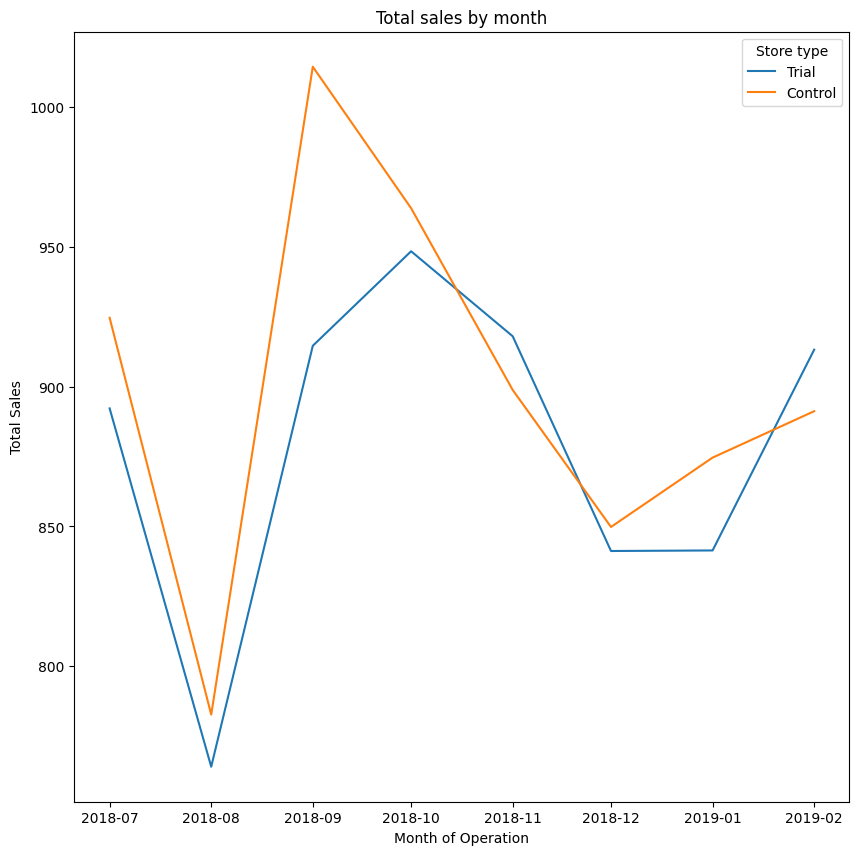

In [47]:
# Plot graph
plt.figure(figsize=(10,10))
sns.lineplot(pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total sales by month')
plt.legend(title= 'Store type')

- We will do the same for customers

In [48]:
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==155)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[pastCustomers['MONTH'] < 201903]
pastCustomers.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
977,86,201807,892.20,99,1.272727,1.992063,3.554582,Trial,2018-07-01
978,86,201808,764.05,94,1.191489,1.919643,3.553721,Trial,2018-08-01
979,86,201809,914.60,103,1.252427,2.000000,3.544961,Trial,2018-09-01
980,86,201810,948.40,109,1.266055,2.000000,3.436232,Trial,2018-10-01
981,86,201811,918.00,100,1.270000,2.000000,3.614173,Trial,2018-11-01


Text(0.5, 1.0, 'Total customers by month')

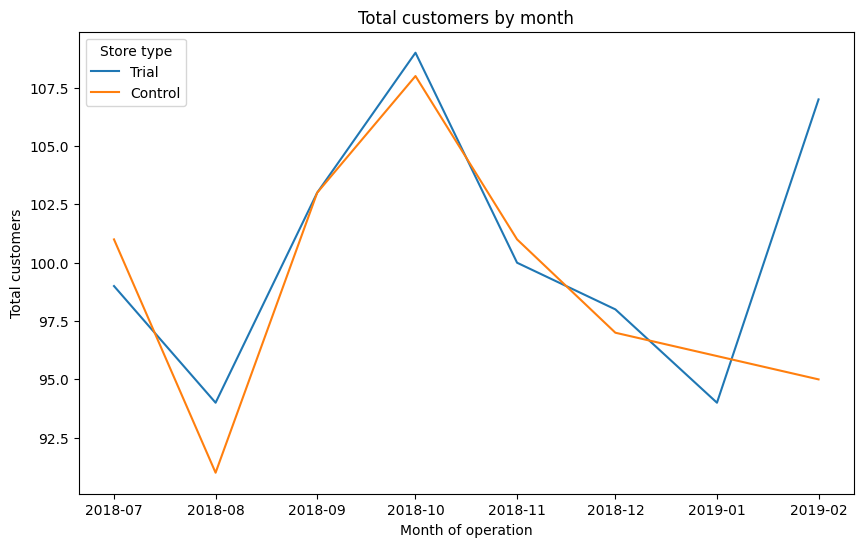

In [49]:
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.legend(title='Store type')
plt.title('Total customers by month')

Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [50]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 86) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 155) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 155].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
1793,201807,155,896.922236
1794,201808,155,759.269991
1795,201809,155,984.034086
1796,201810,155,934.948790
1797,201811,155,871.894555
1798,201812,155,824.361363
1799,201901,155,848.418979
1800,201902,155,864.522060
1801,201903,155,780.320405
1802,201904,155,819.317024


- Calculate the percentage difference between scaled control sales and trial sales 

In [51]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==86][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,155,896.922236,86,892.20,-0.005265
1,201808,155,759.269991,86,764.05,0.006296
2,201809,155,984.034086,86,914.60,-0.070561
3,201810,155,934.948790,86,948.40,0.014387
4,201811,155,871.894555,86,918.00,0.052880
5,201812,155,824.361363,86,841.20,0.020426
6,201901,155,848.418979,86,841.40,-0.008273
7,201902,155,864.522060,86,913.20,0.056306
8,201903,155,780.320405,86,1026.80,0.315870
9,201904,155,819.317024,86,848.20,0.035253


- Calculate the standard deviation for the percentage difference between sales over the period

In [52]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.03768532790008376

- Calculate the t-values of the trial months

In [53]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,155,864.522060,86,913.2,0.056306,0.568756
8,201903,155,780.320405,86,1026.8,0.315870,7.456411
9,201904,155,819.317024,86,848.2,0.035253,0.010085


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [54]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [55]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 86) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 155) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 155].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
1793,201807,155,896.922236
1794,201808,155,759.269991
1795,201809,155,984.034086
1796,201810,155,934.948790
1797,201811,155,871.894555
1798,201812,155,824.361363
1799,201901,155,848.418979
1800,201902,155,864.522060
1801,201903,155,780.320405
1802,201904,155,819.317024


- Calculate the percentage difference between scaled control sales and trial sales 

In [56]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==86][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,155,896.922236,86,892.20,-0.005265
1,201808,155,759.269991,86,764.05,0.006296
2,201809,155,984.034086,86,914.60,-0.070561
3,201810,155,934.948790,86,948.40,0.014387
4,201811,155,871.894555,86,918.00,0.052880
5,201812,155,824.361363,86,841.20,0.020426
6,201901,155,848.418979,86,841.40,-0.008273
7,201902,155,864.522060,86,913.20,0.056306
8,201903,155,780.320405,86,1026.80,0.315870
9,201904,155,819.317024,86,848.20,0.035253


- Calculate the standard deviation for the percentage difference between sales over the period

In [57]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.03768532790008376

- Calculate the t-values of the trial months

In [58]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,155,864.522060,86,913.2,0.056306,0.568756
8,201903,155,780.320405,86,1026.8,0.315870,7.456411
9,201904,155,819.317024,86,848.2,0.035253,0.010085


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [59]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


Let's visualize this by plotting the sales and the confidence intervals of the stores for the trial period.

- Filter data for the 2 stores total sales, and the 95th and 5th percentiles of the control store sales

In [60]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==155)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[(pastSales['MONTH'] >= 201902) & (pastSales['MONTH'] <= 201904)]
# Create new dataframe with the totSales of control store set to 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the totSales of control store set to 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
984,86,201902,913.200000,107,1.299065,1.992806,3.296751,Trial,2019-02-01
985,86,201903,1026.800000,115,1.234783,2.000000,3.615493,Trial,2019-03-01
986,86,201904,848.200000,105,1.209524,2.000000,3.339370,Trial,2019-04-01
1800,155,201902,891.200000,95,1.336842,2.000000,3.508661,Control,2019-02-01
1801,155,201903,804.400000,94,1.276596,2.000000,3.351667,Control,2019-03-01
1802,155,201904,844.600000,99,1.222222,2.000000,3.490083,Control,2019-04-01
1800,155,201902,958.370328,95,1.336842,2.000000,3.508661,Control 95th % confidence interval,2019-02-01
1801,155,201903,865.028156,94,1.276596,2.000000,3.351667,Control 95th % confidence interval,2019-03-01
1802,155,201904,908.258056,99,1.222222,2.000000,3.490083,Control 95th % confidence interval,2019-04-01
1800,155,201902,824.029672,95,1.336842,2.000000,3.508661,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total sales by month')

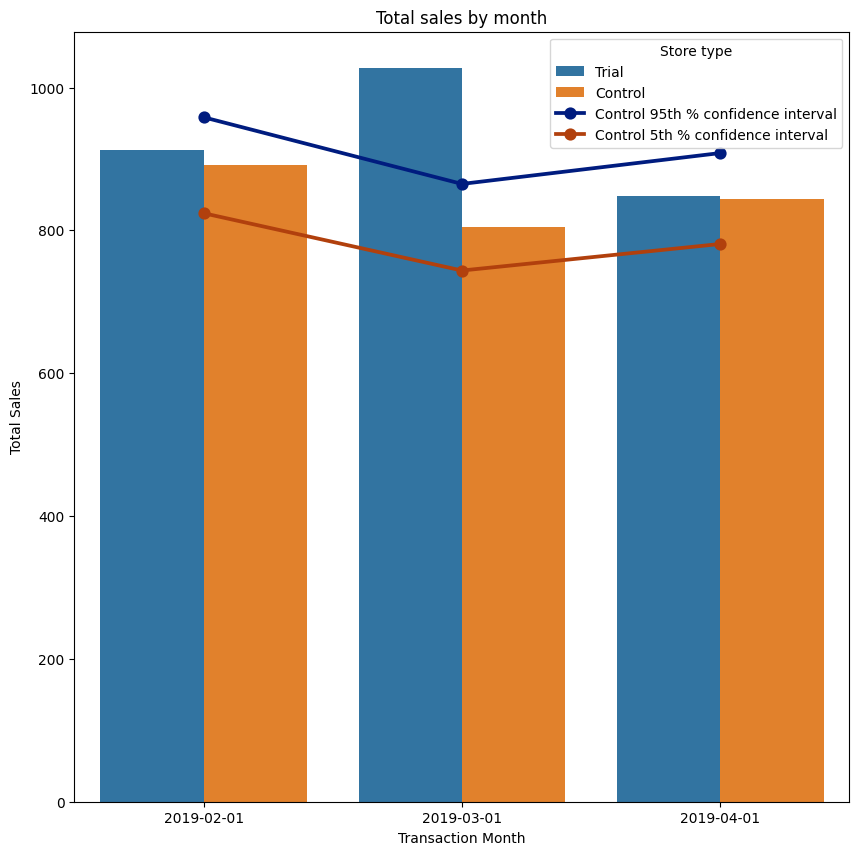

In [61]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
sns.pointplot(data=line, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax, palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales')
plt.legend(title='Store type')
plt.title('Total sales by month')

The results of the sales comparison show that, in terms of sales, the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

Let us now look at this assessment for the number of customers as well. We will be repeating the process from above and only displaying the outputs relevant to our analysis

In [62]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 86) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 155) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum()

# Apply the scaling factor
scaledControlCustomers = measureOverTime[measureOverTime['STORE_NBR'] == 155].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactor
scaledControlCustomers = scaledControlCustomers[['MONTH', 'STORE_NBR', 'controlCustomers']]

# Calculate the percentage difference between the trial and scaled control values
percentagediff = pd.merge(scaledControlCustomers, measureOverTime[measureOverTime['STORE_NBR']==86][['MONTH', 'STORE_NBR', 'nCustomers']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['nCustomers'] - percentagediff['controlCustomers'])/percentagediff['controlCustomers']

# Calculate the standard deviation
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()

- Calculate the t-values of the customer amounts

In [63]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlCustomers,STORE_NBR_y,nCustomers,percentageDiff,tValue
7,201902,155,95.0,86,107,0.126316,4.744258
8,201903,155,94.0,86,115,0.223404,9.811722
9,201904,155,99.0,86,105,0.060606,1.314584


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [64]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


In [65]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==155)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[(pastCustomers['MONTH'] >= 201902) & (pastCustomers['MONTH'] <= 201904)]

# Create new dataframe with the nCustomers of control store set to 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the nCustomers of control store set to 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
984,86,201902,913.2,107.000000,1.299065,1.992806,3.296751,Trial,2019-02-01
985,86,201903,1026.8,115.000000,1.234783,2.000000,3.615493,Trial,2019-03-01
986,86,201904,848.2,105.000000,1.209524,2.000000,3.339370,Trial,2019-04-01
1800,155,201902,891.2,95.000000,1.336842,2.000000,3.508661,Control,2019-02-01
1801,155,201903,804.4,94.000000,1.276596,2.000000,3.351667,Control,2019-03-01
1802,155,201904,844.6,99.000000,1.222222,2.000000,3.490083,Control,2019-04-01
1800,155,201902,891.2,98.640244,1.336842,2.000000,3.508661,Control 95th % confidence interval,2019-02-01
1801,155,201903,804.4,97.601926,1.276596,2.000000,3.351667,Control 95th % confidence interval,2019-03-01
1802,155,201904,844.6,102.793518,1.222222,2.000000,3.490083,Control 95th % confidence interval,2019-04-01
1800,155,201902,891.2,91.359756,1.336842,2.000000,3.508661,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total customers by month')

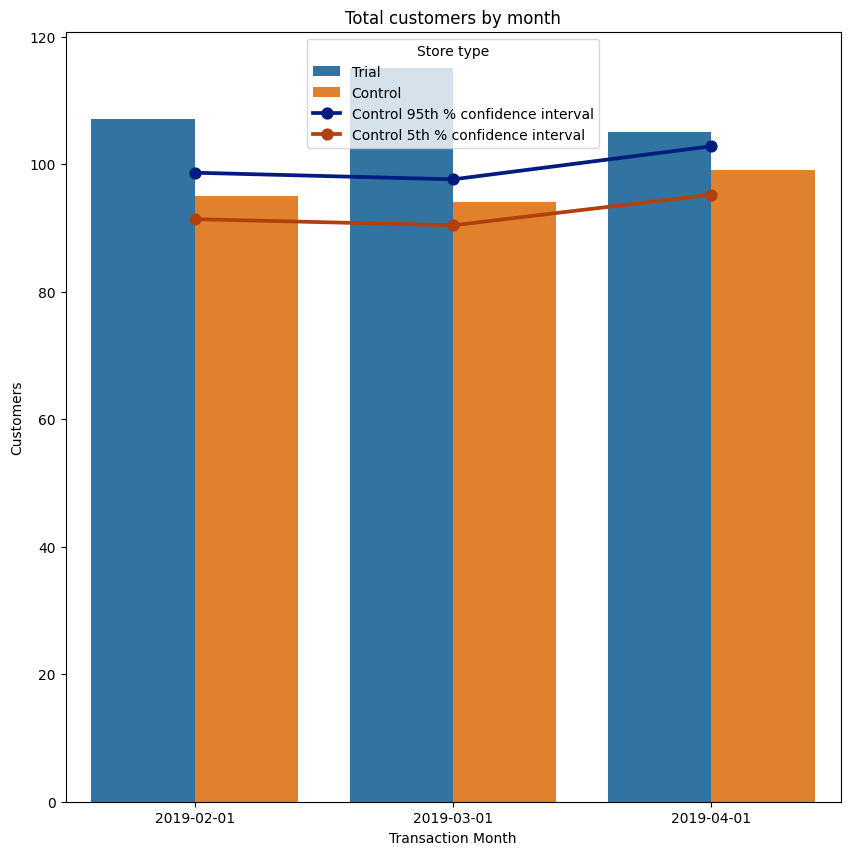

In [66]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='nCustomers', hue='Store_type')
sns.pointplot(data=line, x='TransactionMonth', y='nCustomers', hue='Store_type', palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Customers')
plt.legend(title='Store type')
plt.title('Total customers by month')

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.

### <ins>Trial Store 88 analysis</ins>

- Calculate the correlation scores for each store with trial store 88 for drivers total sales and customers.

In [67]:
# Sales correlation
corr_nSales = calculateCorrelation('totSales', 88)
corr_nSales

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,88,0.906818
1,2,88,0.466037
2,3,88,0.246076
3,4,88,0.127217
4,5,88,0.595165
...,...,...,...
252,268,88,0.489286
253,269,88,0.413711
254,270,88,0.138364
255,271,88,0.448481


In [68]:
# Customers correlation
corr_nCustomers = calculateCorrelation('nCustomers', 88)
corr_nCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE
0,1,88,0.652667
1,2,88,0.273811
2,3,88,0.761442
3,4,88,0.319249
4,5,88,0.487340
...,...,...,...
252,268,88,0.836336
253,269,88,0.362610
254,270,88,0.448484
255,271,88,0.490585


- Next calculate and create tables for the magnitude distance for the drivers between store 86 and the other stores

In [69]:
magnitude_nSales = minMaxDist(calculateMagnitudeDistance('totSales', 88))
magnitude_nSales

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,88,0.143453
1,2,88,0.116355
2,3,88,0.806064
3,4,88,0.901383
4,5,88,0.612614
...,...,...,...
252,268,88,0.161613
253,269,88,0.712728
254,270,88,0.717650
255,271,88,0.615957


In [70]:
magnitude_nCustomers = minMaxDist(calculateMagnitudeDistance('nCustomers', 88))
magnitude_nCustomers

,CONTROL_STORE,TRIAL_STORE,mag_measure
0,1,88,0.353668
1,2,88,0.302289
2,3,88,0.849307
3,4,88,0.930930
4,5,88,0.742127
...,...,...,...
252,268,88,0.337873
253,269,88,0.852599
254,270,88,0.839071
255,271,88,0.743121


- The seperate tables for correlation and magnitude distance can now be merged to calculate a final score for each store

In [71]:
scoreNSales = merge_calcs(['totSales'], 88)

In [72]:
scoreNCustomers = merge_calcs('nCustomers', 88)
scoreNCustomers

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE,mag_measure,Merged_Score
0,1,88,0.652667,0.353668,0.503167
1,2,88,0.273811,0.302289,0.288050
2,3,88,0.761442,0.849307,0.805374
3,4,88,0.319249,0.930930,0.625089
4,5,88,0.487340,0.742127,0.614733
...,...,...,...,...,...
252,268,88,0.836336,0.337873,0.587105
253,269,88,0.362610,0.852599,0.607604
254,270,88,0.448484,0.839071,0.643778
255,271,88,0.490585,0.743121,0.616853


In [73]:
# Merge score tables to calculate final score 
scoreControl = scoreNSales.merge(scoreNCustomers, on= ['TRIAL_STORE', 'CONTROL_STORE'])
scoreControl['Final_Score'] = 0.5 * scoreControl['Merged_Score_x'] + 0.5 * scoreControl['Merged_Score_y']
scoreControl

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
0,1,88,0.906818,0.143453,0.525135,0.652667,0.353668,0.503167,0.514151
1,2,88,0.466037,0.116355,0.291196,0.273811,0.302289,0.288050,0.289623
2,3,88,0.246076,0.806064,0.526070,0.761442,0.849307,0.805374,0.665722
3,4,88,0.127217,0.901383,0.514300,0.319249,0.930930,0.625089,0.569695
4,5,88,0.595165,0.612614,0.603890,0.487340,0.742127,0.614733,0.609312
...,...,...,...,...,...,...,...,...,...
252,268,88,0.489286,0.161613,0.325449,0.836336,0.337873,0.587105,0.456277
253,269,88,0.413711,0.712728,0.563219,0.362610,0.852599,0.607604,0.585412
254,270,88,0.138364,0.717650,0.428007,0.448484,0.839071,0.643778,0.535892
255,271,88,0.448481,0.615957,0.532219,0.490585,0.743121,0.616853,0.574536


In [74]:
# Sort score table to find the closest matching store
scoreControl.sort_values('Final_Score', ascending=False).head()

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
222,237,88,0.654240,0.960010,0.807125,0.973663,0.994284,0.983974,0.895549
167,178,88,0.865928,0.698766,0.782347,0.969733,0.826829,0.898281,0.840314
189,201,88,0.746367,0.876633,0.811500,0.755651,0.926770,0.841211,0.826356
191,203,88,0.754001,0.954734,0.854367,0.642531,0.949543,0.796037,0.825202
112,123,88,0.699881,0.859722,0.779801,0.813963,0.900552,0.857257,0.818529


In [75]:
scoreControl[scoreControl['CONTROL_STORE']==237]

,CONTROL_STORE,TRIAL_STORE,CORRELATION_SCORE_x,mag_measure_x,Merged_Score_x,CORRELATION_SCORE_y,mag_measure_y,Merged_Score_y,Final_Score
222,237,88,0.65424,0.96001,0.807125,0.973663,0.994284,0.983974,0.895549


The store with the highest final score, and therefore the closest to the selected trial store, is Store 237. Now that we have found a control store, let's visually check if the drivers are indeed similar in the period before the trial.

- We will first filter the driver data for the stores

In [76]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==88) | (measureOverTime['STORE_NBR']==237)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 88
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[pastSales['MONTH'] < 201903]
pastSales.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
1001,88,201807,1310.0,129,1.186047,2.00000,4.281046,Trial,2018-07-01
1002,88,201808,1323.8,131,1.221374,1.89375,4.368977,Trial,2018-08-01
1003,88,201809,1423.0,124,1.282258,2.00000,4.474843,Trial,2018-09-01
1004,88,201810,1352.4,123,1.284553,2.00000,4.279747,Trial,2018-10-01
1005,88,201811,1382.8,130,1.207692,2.00000,4.403822,Trial,2018-11-01


- Next we will plot the total sales for both stores to visually compare them

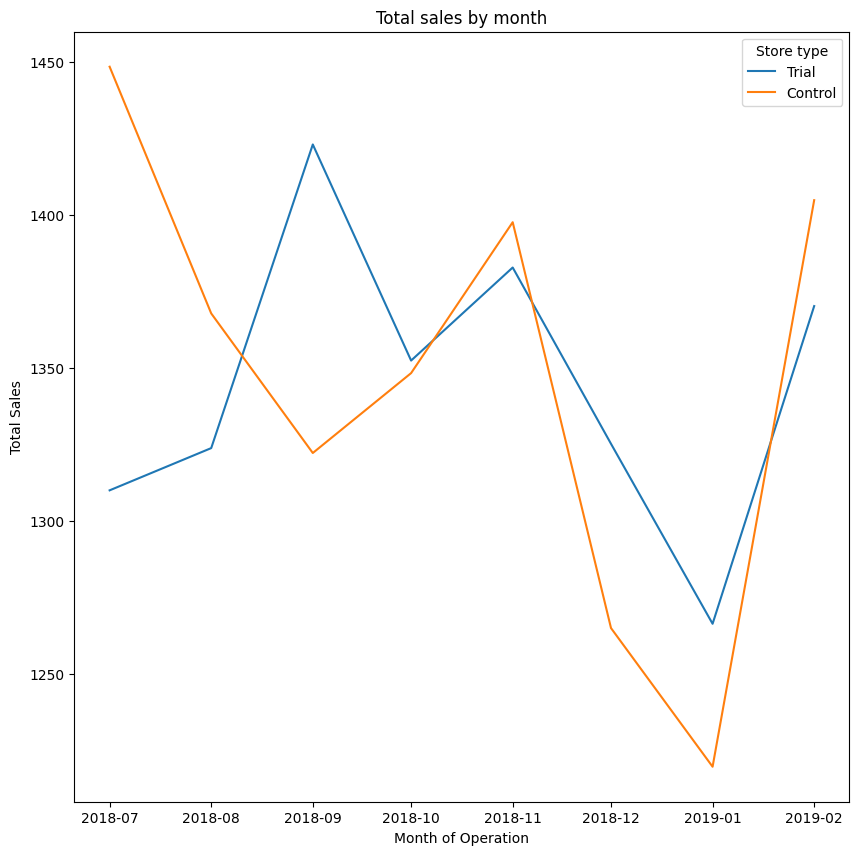

In [77]:
# Plot graph
plt.figure(figsize=(10,10))
sns.lineplot(pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total sales by month')
plt.legend(title= 'Store type')

- We will do the same for customers

In [78]:
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==88) | (measureOverTime['STORE_NBR']==237)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 88
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[pastCustomers['MONTH'] < 201903]
pastCustomers.head()

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
1001,88,201807,1310.0,129,1.186047,2.00000,4.281046,Trial,2018-07-01
1002,88,201808,1323.8,131,1.221374,1.89375,4.368977,Trial,2018-08-01
1003,88,201809,1423.0,124,1.282258,2.00000,4.474843,Trial,2018-09-01
1004,88,201810,1352.4,123,1.284553,2.00000,4.279747,Trial,2018-10-01
1005,88,201811,1382.8,130,1.207692,2.00000,4.403822,Trial,2018-11-01


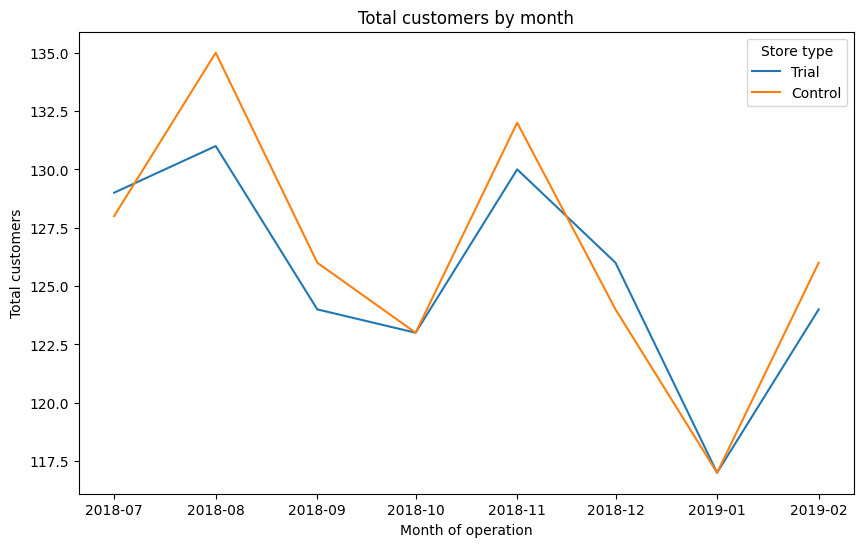

In [79]:
# Plot the data using Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total customers')
plt.title('Total customers by month')
plt.legend(title='Store type')


Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [80]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 88) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 237) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 237].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
2747,201807,237,1450.657086
2748,201808,237,1369.931485
2749,201809,237,1324.260425
2750,201810,237,1350.401097
2751,201811,237,1399.777923
2752,201812,237,1266.971288
2753,201901,237,1221.600696
2754,201902,237,1406.989143
2755,201903,237,1210.082775
2756,201904,237,1206.477165


- Calculate the percentage difference between scaled control sales and trial sales 

In [81]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==88][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,237,1450.657086,88,1310.00,-0.096961
1,201808,237,1369.931485,88,1323.80,-0.033674
2,201809,237,1324.260425,88,1423.00,0.074562
3,201810,237,1350.401097,88,1352.40,0.001480
4,201811,237,1399.777923,88,1382.80,-0.012129
5,201812,237,1266.971288,88,1325.20,0.045959
6,201901,237,1221.600696,88,1266.40,0.036673
7,201902,237,1406.989143,88,1370.20,-0.026147
8,201903,237,1210.082775,88,1477.20,0.220743
9,201904,237,1206.477165,88,1439.40,0.193060


- Calculate the standard deviation for the percentage difference between sales over the period

In [82]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.05724965451900225

- Calculate the t-values of the trial months

In [83]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,237,1406.989143,88,1370.2,-0.026147,-1.424888
8,201903,237,1210.082775,88,1477.2,0.220743,2.887633
9,201904,237,1206.477165,88,1439.4,0.193060,2.404091


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [84]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


Next we will compare the results of the trial period for the trial and control stores

- Scale pre-trial control sales to match pre-trial trial store sales

In [85]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 88) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 237) & (preTrialMeasures['MONTH'] < 201902)]['totSales'].sum()

# Apply the scaling factor
scaledControlSales = measureOverTime[measureOverTime['STORE_NBR'] == 237].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactor
scaledControlSales = scaledControlSales[['MONTH', 'STORE_NBR', 'controlSales']]
scaledControlSales

,MONTH,STORE_NBR,controlSales
2747,201807,237,1450.657086
2748,201808,237,1369.931485
2749,201809,237,1324.260425
2750,201810,237,1350.401097
2751,201811,237,1399.777923
2752,201812,237,1266.971288
2753,201901,237,1221.600696
2754,201902,237,1406.989143
2755,201903,237,1210.082775
2756,201904,237,1206.477165


- Calculate the percentage difference between scaled control sales and trial sales 

In [86]:
percentagediff = pd.merge(scaledControlSales, measureOverTime[measureOverTime['STORE_NBR']==88][['MONTH', 'STORE_NBR', 'totSales']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['totSales'] - percentagediff['controlSales'])/percentagediff['controlSales']
percentagediff

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff
0,201807,237,1450.657086,88,1310.00,-0.096961
1,201808,237,1369.931485,88,1323.80,-0.033674
2,201809,237,1324.260425,88,1423.00,0.074562
3,201810,237,1350.401097,88,1352.40,0.001480
4,201811,237,1399.777923,88,1382.80,-0.012129
5,201812,237,1266.971288,88,1325.20,0.045959
6,201901,237,1221.600696,88,1266.40,0.036673
7,201902,237,1406.989143,88,1370.20,-0.026147
8,201903,237,1210.082775,88,1477.20,0.220743
9,201904,237,1206.477165,88,1439.40,0.193060


- Calculate the standard deviation for the percentage difference between sales over the period

In [87]:
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()
stdDev

0.05724965451900225

- Calculate the t-values of the trial months

In [88]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlSales,STORE_NBR_y,totSales,percentageDiff,tValue
7,201902,237,1406.989143,88,1370.2,-0.026147,-1.424888
8,201903,237,1210.082775,88,1477.2,0.220743,2.887633
9,201904,237,1206.477165,88,1439.4,0.193060,2.404091


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [89]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


Let's visualize this by plotting the sales and the confidence intervals of the stores for the trial period.

- Filter data for the 2 stores total sales, and the 95th and 5th percentiles of the control store sales

In [90]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastSales = measureOverTime[(measureOverTime['STORE_NBR']==88) | (measureOverTime['STORE_NBR']==237)].copy()
pastSales['Store_type'] = pastSales.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 88
                                                    else 'Control',
                                                    axis=1
                                                )
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['MONTH'], format='%Y%m')
pastSales = pastSales[(pastSales['MONTH'] >= 201902) & (pastSales['MONTH'] <= 201904)]
# Create new dataframe with the totSales of control store set to 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the totSales of control store set to 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
1008,88,201902,1370.200000,124,1.241935,2.0,4.448701,Trial,2019-02-01
1009,88,201903,1477.200000,134,1.268657,2.0,4.344706,Trial,2019-03-01
1010,88,201904,1439.400000,128,1.265625,2.0,4.442593,Trial,2019-04-01
2754,237,201902,1404.800000,126,1.246032,2.0,4.473885,Control,2019-02-01
2755,237,201903,1208.200000,119,1.151261,2.0,4.409489,Control,2019-03-01
2756,237,201904,1204.600000,120,1.133333,2.0,4.428676,Control,2019-04-01
2754,237,201902,1565.648629,126,1.246032,2.0,4.473885,Control 95th % confidence interval,2019-02-01
2755,237,201903,1346.538065,119,1.151261,2.0,4.409489,Control 95th % confidence interval,2019-03-01
2756,237,201904,1342.525868,120,1.133333,2.0,4.428676,Control 95th % confidence interval,2019-04-01
2754,237,201902,1243.951371,126,1.246032,2.0,4.473885,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total sales by month')

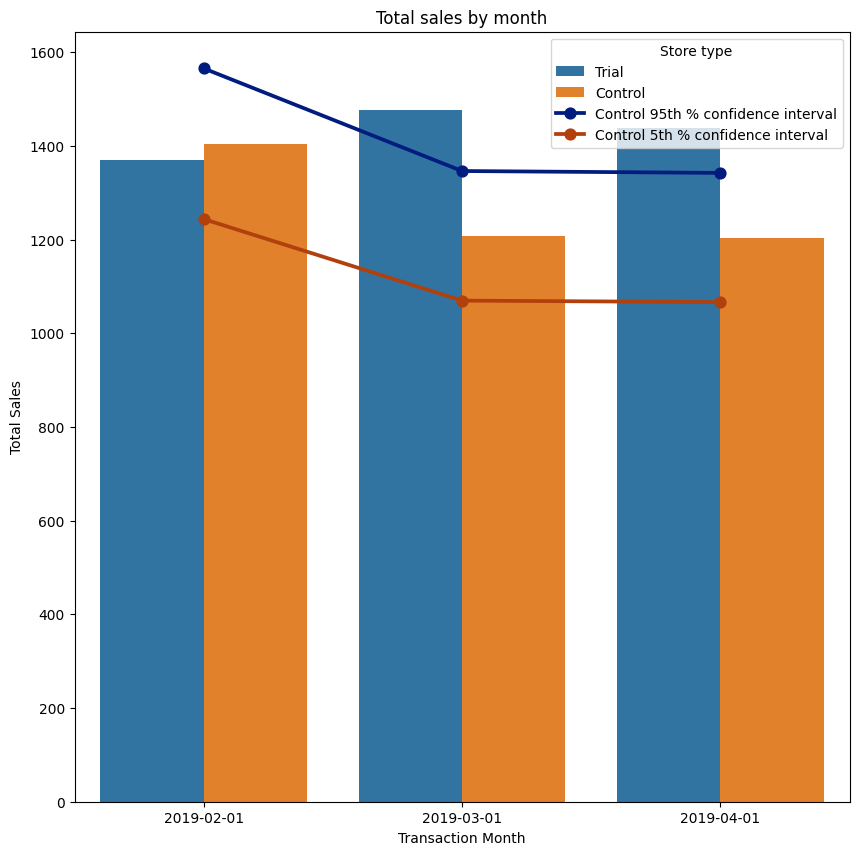

In [91]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
sns.pointplot(data=line, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax, palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales')
plt.legend(title='Store type')
plt.title('Total sales by month')

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

Let us now look at this assessment for the number of customers as well. We will be repeating the process from above and only displaying the outputs relevant to our analysis

In [92]:
# Calculate scaling factor
scalingFactor = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 86) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == 155) & (preTrialMeasures['MONTH'] < 201902)]['nCustomers'].sum()

# Apply the scaling factor
scaledControlCustomers = measureOverTime[measureOverTime['STORE_NBR'] == 155].copy()
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['nCustomers'] * scalingFactor
scaledControlCustomers = scaledControlCustomers[['MONTH', 'STORE_NBR', 'controlCustomers']]

# Calculate the percentage difference between the trial and scaled control values
percentagediff = pd.merge(scaledControlCustomers, measureOverTime[measureOverTime['STORE_NBR']==86][['MONTH', 'STORE_NBR', 'nCustomers']], how='left', on='MONTH')
percentagediff['percentageDiff'] = (percentagediff['nCustomers'] - percentagediff['controlCustomers'])/percentagediff['controlCustomers']

# Calculate the standard deviation
stdDev = percentagediff[percentagediff['MONTH'] < 201902]['percentageDiff'].std()

- Calculate the t-values of the customer amounts

In [93]:
percentagediff['tValue'] = (percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]['percentageDiff'] - percentagediff['percentageDiff'].mean()) / stdDev
trialTable = percentagediff[(percentagediff['MONTH'] >= 201902) & (percentagediff['MONTH'] <= 201904)]
trialTable

,MONTH,STORE_NBR_x,controlCustomers,STORE_NBR_y,nCustomers,percentageDiff,tValue
7,201902,155,95.0,86,107,0.126316,4.744258
8,201903,155,94.0,86,115,0.223404,9.811722
9,201904,155,99.0,86,105,0.060606,1.314584


- Find the 95th percentile of the t distribution with the appropriate degree of freedom

In [94]:
from scipy.stats import t
# Set degrees of freedom
degreesOfFreedom = 7
# Calculate percentile
p = t.ppf(0.95, df=degreesOfFreedom)
print(f'The 95th percentile of the t-distribution is {p}')

The 95th percentile of the t-distribution is 1.894578605061305


In [95]:
# Filter the measureOverTime dataframe for only the control and trial stores
pastCustomers = measureOverTime[(measureOverTime['STORE_NBR']==86) | (measureOverTime['STORE_NBR']==155)].copy()
pastCustomers['Store_type'] = pastCustomers.apply(
                                                    lambda row: 'Trial' if row['STORE_NBR'] == 86
                                                    else 'Control',
                                                    axis=1
                                                )
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['MONTH'], format='%Y%m')
pastCustomers = pastCustomers[(pastCustomers['MONTH'] >= 201902) & (pastCustomers['MONTH'] <= 201904)]

# Create new dataframe with the nCustomers of control store set to 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Create new dataframe with the nCustomers of control store set to 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concat the 3 new dataframes together
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])
trialAssessment

,STORE_NBR,MONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,TransactionMonth
984,86,201902,913.2,107.000000,1.299065,1.992806,3.296751,Trial,2019-02-01
985,86,201903,1026.8,115.000000,1.234783,2.000000,3.615493,Trial,2019-03-01
986,86,201904,848.2,105.000000,1.209524,2.000000,3.339370,Trial,2019-04-01
1800,155,201902,891.2,95.000000,1.336842,2.000000,3.508661,Control,2019-02-01
1801,155,201903,804.4,94.000000,1.276596,2.000000,3.351667,Control,2019-03-01
1802,155,201904,844.6,99.000000,1.222222,2.000000,3.490083,Control,2019-04-01
1800,155,201902,891.2,98.640244,1.336842,2.000000,3.508661,Control 95th % confidence interval,2019-02-01
1801,155,201903,804.4,97.601926,1.276596,2.000000,3.351667,Control 95th % confidence interval,2019-03-01
1802,155,201904,844.6,102.793518,1.222222,2.000000,3.490083,Control 95th % confidence interval,2019-04-01
1800,155,201902,891.2,91.359756,1.336842,2.000000,3.508661,Control 5th % confidence interval,2019-02-01


Text(0.5, 1.0, 'Total customers by month')

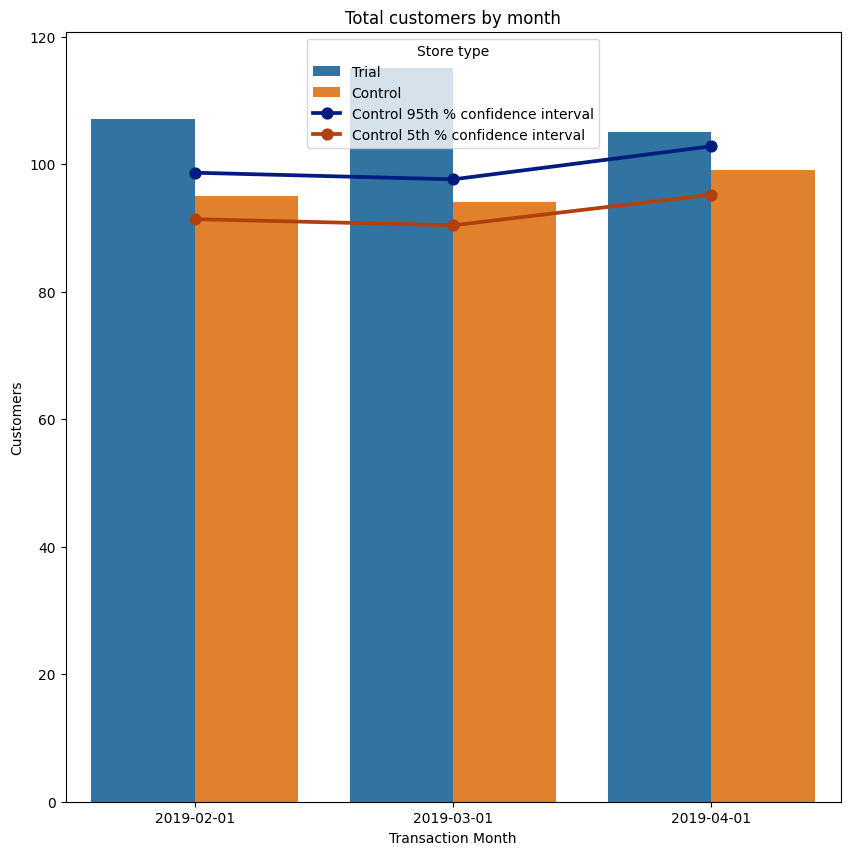

In [96]:
bar = trialAssessment[(trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial')]
line = trialAssessment[~((trialAssessment['Store_type'] == 'Control') | (trialAssessment['Store_type'] == 'Trial'))]

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=bar, x='TransactionMonth', y='nCustomers', hue='Store_type')
sns.pointplot(data=line, x='TransactionMonth', y='nCustomers', hue='Store_type', palette='dark')
plt.xlabel('Transaction Month')
plt.ylabel('Customers')
plt.legend(title='Store type')
plt.title('Total customers by month')

Total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.